Step 1: Generate random sales data in CSV, Excel, and JSON formats for testing.
Step 2: Load data from each format.
Step 3: Combine the datasets into a single DataFrame.
Step 4: Explore the data for missing values and inconsistencies.
Step 5: Clean the data by filling missing values and removing duplicates.
Step 6: Transform the data by standardizing date formats and deriving new columns.
Step 7: Perform basic descriptive statistics to understand the sales data.
Step 8: Visualize sales by category, monthly trends, and order values across categories.

In [1]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Generate random sales data
num_records = 100
data = {
    'Date': pd.date_range(start='2023-01-01', periods=num_records, freq='D'),
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Furniture', 'Toys', 'Groceries'], num_records),
    'Sales': np.round(np.random.uniform(50, 500, num_records), 2),
    'Order_ID': [f"ORD{str(i).zfill(5)}" for i in range(1, num_records + 1)]
}

# Create three datasets in different formats
csv_data = pd.DataFrame(data)
excel_data = pd.DataFrame(data)
json_data = pd.DataFrame(data)

# Save datasets to files
csv_data.to_csv('sales_data.csv', index=False)
excel_data.to_excel('sales_data.xlsx', index=False)
json_data.to_json('sales_data.json', orient='records')

print("Random datasets created and saved as 'sales_data.csv', 'sales_data.xlsx', and 'sales_data.json'.")


Random datasets created and saved as 'sales_data.csv', 'sales_data.xlsx', and 'sales_data.json'.


In [2]:
# Import necessary libraries for data handling
import pandas as pd

# Load data from each format
csv_data = pd.read_csv('sales_data.csv')
excel_data = pd.read_excel('sales_data.xlsx', sheet_name=0)  # Load the first sheet
json_data = pd.read_json('sales_data.json')

# Print head of each loaded DataFrame
print("CSV Data Sample:")
print(csv_data.head())

print("\nExcel Data Sample:")
print(excel_data.head())

print("\nJSON Data Sample:")
print(json_data.head())


CSV Data Sample:
         Date Product_Category   Sales  Order_ID
0  2023-01-01             Toys  461.73  ORD00001
1  2023-01-02        Groceries  432.52  ORD00002
2  2023-01-03        Furniture  252.25  ORD00003
3  2023-01-04        Groceries   92.93  ORD00004
4  2023-01-05        Groceries  216.87  ORD00005

Excel Data Sample:
        Date Product_Category   Sales  Order_ID
0 2023-01-01             Toys  461.73  ORD00001
1 2023-01-02        Groceries  432.52  ORD00002
2 2023-01-03        Furniture  252.25  ORD00003
3 2023-01-04        Groceries   92.93  ORD00004
4 2023-01-05        Groceries  216.87  ORD00005

JSON Data Sample:
        Date Product_Category   Sales  Order_ID
0 2023-01-01             Toys  461.73  ORD00001
1 2023-01-02        Groceries  432.52  ORD00002
2 2023-01-03        Furniture  252.25  ORD00003
3 2023-01-04        Groceries   92.93  ORD00004
4 2023-01-05        Groceries  216.87  ORD00005


In [3]:
# Combine data into a single DataFrame
data = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

print("\nCombined Data Sample:")
print(data.head())



Combined Data Sample:
         Date Product_Category   Sales  Order_ID
0  2023-01-01             Toys  461.73  ORD00001
1  2023-01-02        Groceries  432.52  ORD00002
2  2023-01-03        Furniture  252.25  ORD00003
3  2023-01-04        Groceries   92.93  ORD00004
4  2023-01-05        Groceries  216.87  ORD00005


In [4]:
# Explore the structure of the data
print("\nData Info:")
print(data.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Quick statistical summary
print("\nStatistical Summary of Numeric Columns:")
print(data.describe())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              300 non-null    object 
 1   Product_Category  300 non-null    object 
 2   Sales             300 non-null    float64
 3   Order_ID          300 non-null    object 
dtypes: float64(1), object(3)
memory usage: 9.5+ KB
None

Missing Values in Each Column:
Date                0
Product_Category    0
Sales               0
Order_ID            0
dtype: int64

Statistical Summary of Numeric Columns:
            Sales
count  300.000000
mean   268.682700
std    121.684396
min     50.230000
25%    164.987500
50%    258.540000
75%    363.015000
max    498.980000


In [5]:
# Fill or drop missing values if required
data.fillna(method='ffill', inplace=True)  # Example: Forward-fill missing values
data.drop_duplicates(inplace=True)  # Remove duplicates

# Verify data after cleaning
print("\nData after Cleaning:")
print(data.info())



Data after Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              200 non-null    object 
 1   Product_Category  200 non-null    object 
 2   Sales             200 non-null    float64
 3   Order_ID          200 non-null    object 
dtypes: float64(1), object(3)
memory usage: 7.8+ KB
None


<ipython-input-5-4aa161cf73bd>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Example: Forward-fill missing values


In [6]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Create 'Year' and 'Month' columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Check data after transformation
print("\nData after Transformation:")
print(data.head())



Data after Transformation:
        Date Product_Category   Sales  Order_ID  Year  Month
0 2023-01-01             Toys  461.73  ORD00001  2023      1
1 2023-01-02        Groceries  432.52  ORD00002  2023      1
2 2023-01-03        Furniture  252.25  ORD00003  2023      1
3 2023-01-04        Groceries   92.93  ORD00004  2023      1
4 2023-01-05        Groceries  216.87  ORD00005  2023      1


In [7]:
# Calculate total sales and average order value
total_sales = data['Sales'].sum()
avg_order_value = data['Sales'].mean()
category_distribution = data['Product_Category'].value_counts()

print(f"\nTotal Sales: {total_sales}")
print(f"Average Order Value: {avg_order_value}")
print("\nProduct Category Distribution:")
print(category_distribution)



Total Sales: 53736.54000000001
Average Order Value: 268.68270000000007

Product Category Distribution:
Product_Category
Toys           52
Clothing       42
Groceries      38
Electronics    36
Furniture      32
Name: count, dtype: int64


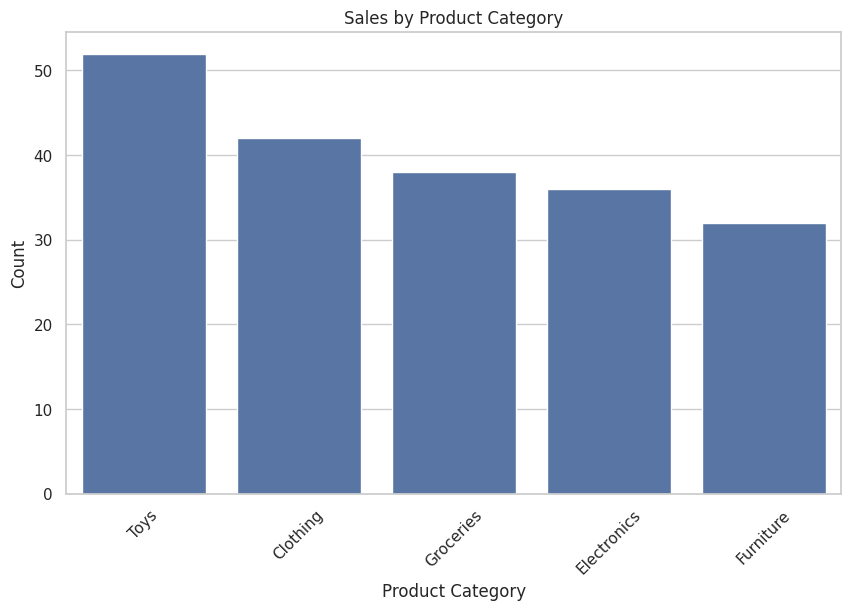

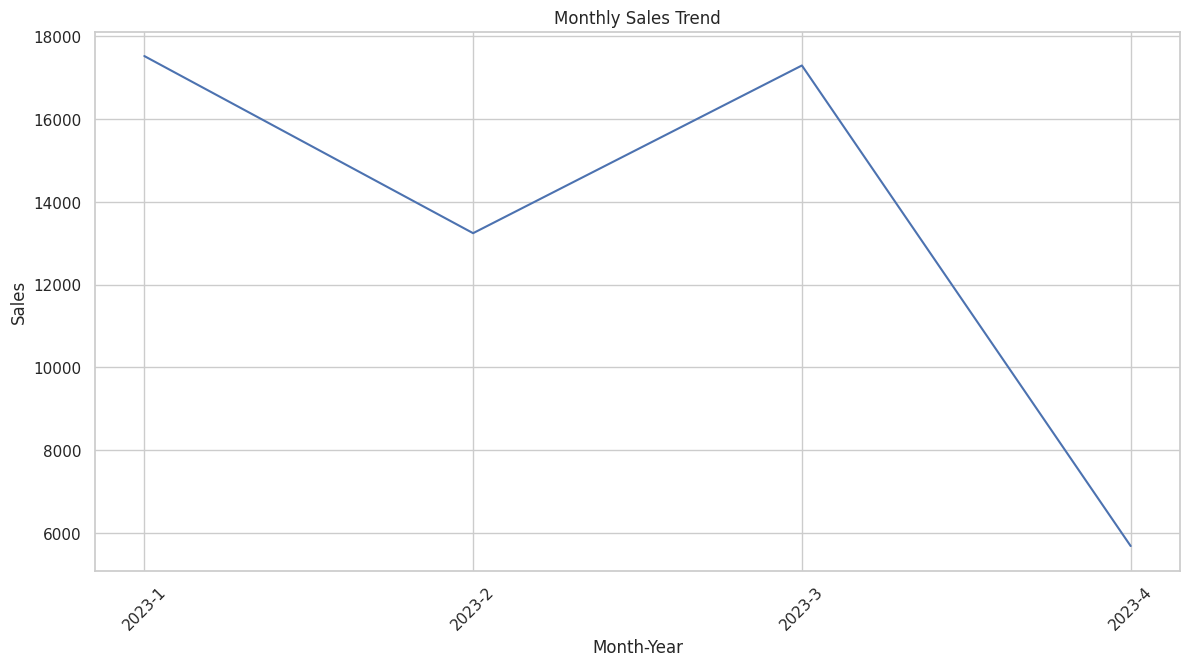

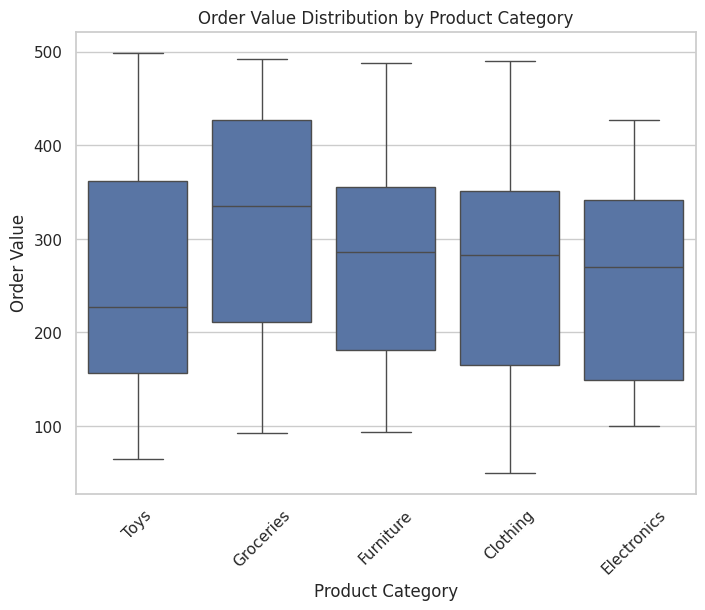

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set(style="whitegrid")

# 1. Bar Plot for Sales by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title("Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. Line Plot for Monthly Sales Trend
monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Year'].astype(str) + "-" + monthly_sales['Month'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Sales')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

# 3. Box Plot for Order Value Distribution by Category
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Product_Category', y='Sales')
plt.title("Order Value Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Order Value")
plt.xticks(rotation=45)
plt.show()


Certainly! Let’s go through each step in detail to understand what’s happening at each stage.

---

### Step 1: Generate a Random Dataset

We start by creating a random dataset to simulate sales data in various formats. This step helps us create sample data to load from different file types.

```python
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Generate random sales data
num_records = 100
data = {
    'Date': pd.date_range(start='2023-01-01', periods=num_records, freq='D'),
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Furniture', 'Toys', 'Groceries'], num_records),
    'Sales': np.round(np.random.uniform(50, 500, num_records), 2),
    'Order_ID': [f"ORD{str(i).zfill(5)}" for i in range(1, num_records + 1)]
}
```

- **Date**: Generates a sequence of dates starting from January 1, 2023, with 100 records.
- **Product_Category**: Randomly assigns a product category to each record from a list of categories.
- **Sales**: Generates a random sales value between $50 and $500.
- **Order_ID**: Generates a unique order ID for each sale.

After creating the `data` dictionary, we create three DataFrames (`csv_data`, `excel_data`, `json_data`) for each format and save them as files.

---

### Step 2: Load the Sales Data from Each File Format

Next, we load the data saved in different formats into separate DataFrames.

```python
# Load data from each format
csv_data = pd.read_csv('sales_data.csv')
excel_data = pd.read_excel('sales_data.xlsx', sheet_name=0)
json_data = pd.read_json('sales_data.json')
```

- `pd.read_csv`: Loads the CSV file.
- `pd.read_excel`: Loads the Excel file from the first sheet.
- `pd.read_json`: Loads the JSON file.

After loading, we print a few rows from each DataFrame to confirm the data is loaded correctly.

---

### Step 3: Combine Data into a Single DataFrame

Since we want to analyze all data together, we concatenate the DataFrames from the different file formats into a single DataFrame.

```python
data = pd.concat([csv_data, excel_data, json_data], ignore_index=True)
```

- `pd.concat`: Merges the DataFrames into a single one and resets the index with `ignore_index=True`.

Printing a few rows from `data` shows us a combined dataset with all the records.

---

### Step 4: Explore the Data for Inconsistencies and Missing Values

Now, we analyze the data structure and check for missing values or inconsistencies.

```python
print(data.info())
print(data.isnull().sum())
print(data.describe())
```

- `data.info()`: Shows data types, non-null counts, and memory usage, which helps us check for any missing or unexpected data types.
- `data.isnull().sum()`: Calculates the number of missing values per column.
- `data.describe()`: Provides a statistical summary of numeric columns (like `Sales`), allowing us to understand the range, mean, and spread of our data.

This step lets us identify issues like missing values, data type inconsistencies, or unexpected ranges.

---

### Step 5: Data Cleaning - Handle Missing Values and Remove Duplicates

We now clean the data by handling missing values and removing duplicates.

```python
data.fillna(method='ffill', inplace=True)
data.drop_duplicates(inplace=True)
```

- `data.fillna(method='ffill')`: Fills missing values by carrying forward the previous value in the column (you can also choose other methods, such as dropping rows with missing values if appropriate).
- `data.drop_duplicates()`: Removes duplicate rows to ensure each record is unique.

After cleaning, we print `data.info()` again to confirm that missing values are handled and duplicates are removed.

---

### Step 6: Data Transformation - Convert Date Column and Derive New Columns

In this step, we standardize the date format and create new columns (`Year` and `Month`) to make the data easier to analyze.

```python
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
```

- `pd.to_datetime`: Converts the `Date` column to datetime format, which is helpful for time-based analysis.
- `data['Date'].dt.year` and `data['Date'].dt.month`: Extracts the year and month from the `Date` column, making it easier to analyze seasonal trends.

Printing the transformed `data` now shows additional columns for `Year` and `Month`, which will be useful for aggregations.

---

### Step 7: Perform Descriptive Statistics and Aggregation

Now, we calculate basic statistics such as total sales, average order value, and product category distribution.

```python
total_sales = data['Sales'].sum()
avg_order_value = data['Sales'].mean()
category_distribution = data['Product_Category'].value_counts()
```

- `data['Sales'].sum()`: Calculates total sales across all records.
- `data['Sales'].mean()`: Computes the average value of an order.
- `data['Product_Category'].value_counts()`: Counts the occurrences of each product category, providing insight into which categories are the most popular.

We print these results to get a snapshot of our sales data, understanding overall revenue and category performance.

---

### Step 8: Data Visualization

Lastly, we visualize the data to uncover patterns and trends in sales.

```python
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
```

#### Visualization 1: Sales by Product Category

```python
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title("Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
```

- A **bar plot** visualizes the count of each product category, highlighting which products are most sold.

#### Visualization 2: Monthly Sales Trend

```python
monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Year'].astype(str) + "-" + monthly_sales['Month'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Sales')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()
```

- A **line plot** of monthly sales helps us see trends over time, showing when sales peak or dip.

#### Visualization 3: Order Value Distribution by Product Category

```python
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Product_Category', y='Sales')
plt.title("Order Value Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Order Value")
plt.xticks(rotation=45)
plt.show()
```

- A **box plot** displays the range and variability of sales within each product category, helping us spot outliers and understand distribution patterns.

---

### Summary

Each step builds on the previous ones:
1. **Data Generation**: Created a sample dataset.
2. **Data Loading**: Loaded data from various formats.
3. **Combining Data**: Merged all files into a single dataset.
4. **Data Exploration**: Checked for missing values and inconsistencies.
5. **Data Cleaning**: Handled missing values and removed duplicates.
6. **Data Transformation**: Standardized dates and created new columns.
7. **Descriptive Statistics**: Calculated totals, averages, and distributions.
8. **Data Visualization**: Visualized trends and patterns in sales data.

Following this sequence makes the analysis process organized and thorough. Let me know if you'd like further customization on any part!